Unsupervised Learning

K-Means Clustering with PCA Visualization

Dataset Preview:
   CustomerID  Age  Gender  Tenure  Usage Frequency  Support Calls  \
0           1   22  Female      25               14              4   
1           2   41  Female      28               28              7   
2           3   47    Male      27               10              2   
3           4   35    Male       9               12              5   
4           5   53  Female      58               24              9   

   Payment Delay Subscription Type Contract Length  Total Spend  \
0             27             Basic         Monthly          598   
1             13          Standard         Monthly          584   
2             29           Premium          Annual          757   
3             17           Premium       Quarterly          232   
4              2          Standard          Annual          533   

   Last Interaction  Churn  
0                 9      1  
1                20      0  
2                21      0  
3                18      0  
4             

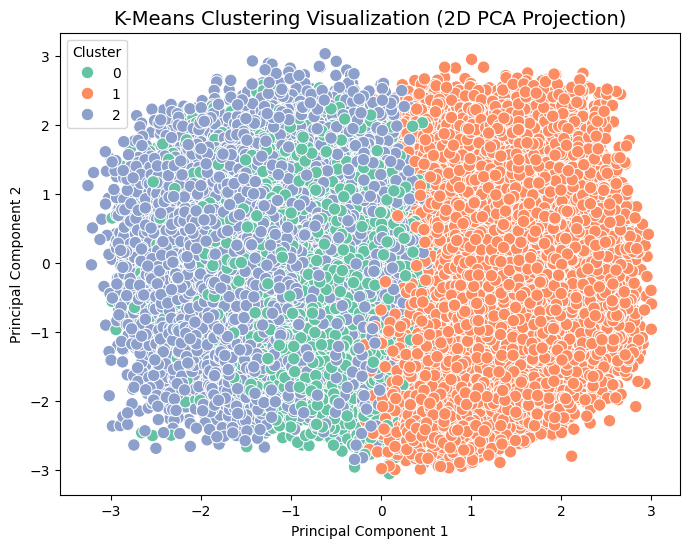

Cluster Centers (in PCA space):
             PCA1      PCA2
Cluster                    
0       -1.097620 -0.101182
1        1.420518 -0.006246
2       -1.284628  0.095494


In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
# Replace 'your_dataset.csv' with your actual file name
df = pd.read_csv('customer_churn_dataset.csv')

# Display first few rows
print("Dataset Preview:")
print(df.head())

# Drop non-numeric columns if any (for clustering)
numeric_df = df.select_dtypes(include=[np.number])

# Handle missing values if any
numeric_df = numeric_df.dropna()

# Standardize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# Apply PCA (2 components for visualization)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # You can change number of clusters
clusters = kmeans.fit_predict(scaled_data)

# Add cluster and PCA columns for visualization
pca_df = pd.DataFrame(pca_data, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = clusters

# Visualize Clusters
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=pca_df,
    x='PCA1',
    y='PCA2',
    hue='Cluster',
    palette='Set2',
    s=80
)
plt.title("K-Means Clustering Visualization (2D PCA Projection)", fontsize=14)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Cluster')
plt.show()

# Print cluster centers in PCA space
print("Cluster Centers (in PCA space):")
print(pca_df.groupby('Cluster')[['PCA1', 'PCA2']].mean())
